<a href="https://colab.research.google.com/github/SaiAmartya/LearningPytorch/blob/main/IrisClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The purpose of this program is to demonstrate a simple **Neural Network** that **classifies** Iris flowers.

I will use this publically available iris dataset: [iris.csv](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)

In [211]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [212]:
# Create a Model class that inherits nn.Module
class Model(nn.Module):
  '''
  Input layer (4 features of the flower) ->
  Hidden Layer1 (number of neurons) ->
  H2(n) -->
  output(classify iris flower)
  '''
  def __init__(self, in_features=4,h1=8, h2=9, out_features=3):
    super().__init__() # Instantiate the nn.Module
    # Apply an affine linear transformation
    # fc = fully connected layer
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    # Relu transformation function
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [213]:
torch.manual_seed(32) # manual seed for randomization, ensures the randomness in network is consistent
model = Model() # instance of model

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv' # training file
my_df = pd.read_csv(url,sep=',')

In [216]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [217]:
# Transform classification into numerical values
my_df['variety'] = my_df['variety'].replace({'Setosa':0.0,'Versicolor':1.0,'Virginica':2.0})

<ipython-input-217-3f3cfcbaf948>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace({'Setosa':0.0,'Versicolor':1.0,'Virginica':2.0})


In [218]:
# Train test
X = my_df.drop('variety',axis='columns')
Y = my_df['variety'] # The variety of the iris flower

# Convert dataframes to a numpy arrays
X = X.values
Y = Y.values

In [219]:
from sklearn.model_selection import train_test_split

# Train Test Split, % 80 training, % 20 testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [220]:
# Convert to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [221]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss() # Loss Function suitable for multi-class classification

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Popular optimization algorithm known for efficiency

In [222]:
# Train our model
# Epoch? (One run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forwards and get a prediction
  y_pred = model.forward(x_train) # Get the predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Do back propagation: take error rate of forward propagation and feed it backward
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1699321269989014
Epoch: 10 Loss: 0.9570867419242859
Epoch: 20 Loss: 0.7980871796607971
Epoch: 30 Loss: 0.6327950358390808
Epoch: 40 Loss: 0.43861737847328186
Epoch: 50 Loss: 0.2904532253742218
Epoch: 60 Loss: 0.1778070330619812
Epoch: 70 Loss: 0.11584122478961945
Epoch: 80 Loss: 0.0893637090921402
Epoch: 90 Loss: 0.077529177069664


Text(0.5, 0, 'Epoch')

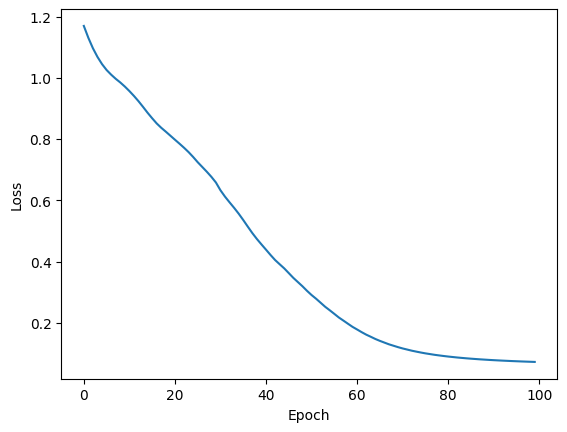

In [223]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [224]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Turn off back propogation, just to send it straight through
  y_eval = model.forward(x_test) # x_test are features from our test set
  loss = criterion(y_eval,y_test) # Find the loss ro error

In [225]:
loss

tensor(0.0538)

In [226]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    # What type of flower the network thinks it is
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print("correct:",correct)

1.) tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1
2.) tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
3.) tensor([  6.5956,   1.5027, -10.4091]) 	 0 	 0
4.) tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1
5.) tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2
6.) tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2
7.) tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
8.) tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
9.) tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1
10.) tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11.) tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1
12.) tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2
13.) tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1
14.) tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1
15.) tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2
16.) tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2
17.) tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1
18.) tensor([-6.7608,  2.7754,  4.5281]) 	 2 	 2
19.) tensor([-1.7048,  4.1980, -1.4670]) 	 1 	 1
20.) tensor([  7.7757,   1.3740, -11.8864]) 	 0 	 0
21.) tensor

In [227]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8]) # Sepal Length, Sepal Width, Petal Length, Petal Width

In [228]:
variety = {0:'Setosa',1:'Versicolor',2:'Virginica'}
with torch.no_grad(): # No backward propagation
  newer_iris_classification = model.forward(newer_iris)
  print(f"Data:{newer_iris} \t Prediction: {variety[newer_iris_classification.argmax().item()]}")

Data:tensor([5.9000, 3.0000, 5.1000, 1.8000]) 	 Prediction: Virginica


In [229]:
# Save our NN Model
torch.save(model.state_dict(), 'IrisModel.pt')

In [230]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('IrisModel.pt'))

<ipython-input-230-3187bcb3dea9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('IrisModel.pt'))


<All keys matched successfully>

In [231]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)